<a href="https://colab.research.google.com/github/oroyansarah22/CHAPTER-9/blob/main/Value_At_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import datetime as dt
import numpy as np
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

# List of stocks
StockList = ['ADBE', 'CSCO', 'IBM', 'NVDA', 'MSFT', 'HPQ']

# Date range (same as book)
StartDay = dt.datetime(2021, 1, 1)
EndDay = dt.datetime(2021, 12, 31)

# Use STOOQ instead of Yahoo (STOOQ is stable and does not alter historical prices)
StockData = wb.DataReader(StockList, 'stooq', StartDay, EndDay)

# Stooq returns descending dates — reverse to ascending
StockData = StockData.sort_index()

# Use Close price (not adjusted)
StockClose = StockData["Close"]

# Display descriptive statistics
print(StockClose.describe())

Symbols        ADBE        CSCO         IBM        NVDA        MSFT  \
count    252.000000  252.000000  252.000000  252.000000  252.000000   
mean     560.613651   51.155337  124.744008   19.483423  267.994599   
std       76.180505    4.618419    9.139196    5.863762   36.506374   
min      421.200000   41.744100  107.567000   11.563800  205.161000   
25%      488.295000   49.123000  117.008000   14.282850  236.299750   
50%      569.325000   51.584250  127.245500   19.170300  269.148500   
75%      632.420000   54.217550  132.730500   22.201900  293.678000   
max      688.370000   62.013700  140.611000   33.316300  334.433000   

Symbols         HPQ  
count    252.000000  
mean      28.929900  
std        3.193705  
min       22.764900  
25%       26.987825  
50%       28.438800  
75%       30.575425  
max       36.927600  


Text(0.5, 1.0, 'HPQ')

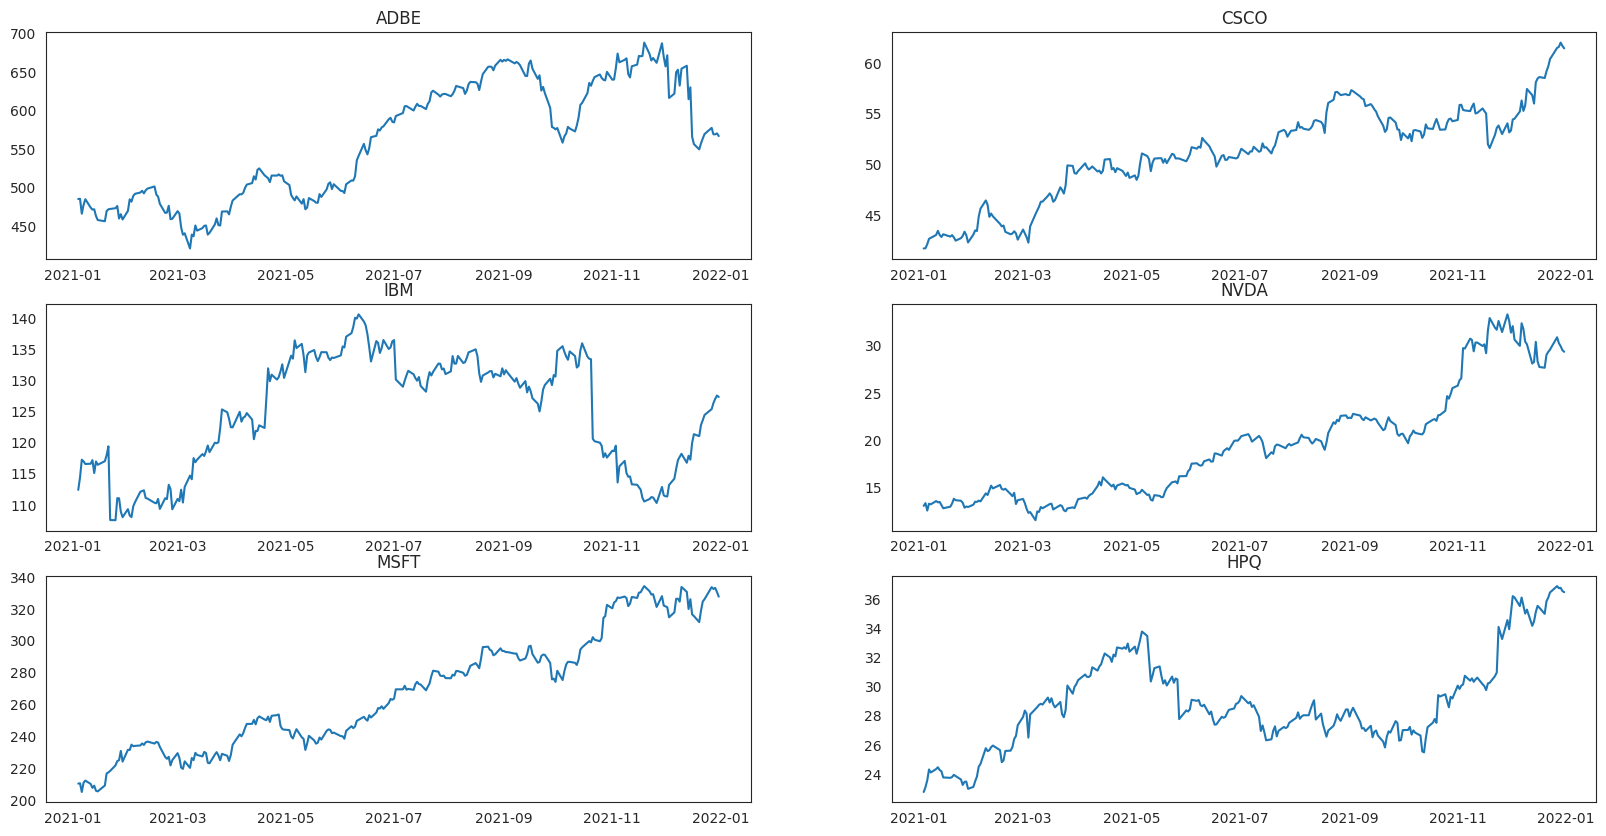

In [33]:
fig, axs = plt.subplots(3, 2, figsize=(20,10))
axs[0, 0].plot(StockClose['ADBE'])
axs[0, 0].set_title('ADBE')
axs[0, 1].plot(StockClose['CSCO'])
axs[0, 1].set_title('CSCO')
axs[1, 0].plot(StockClose['IBM'])
axs[1, 0].set_title('IBM')
axs[1, 1].plot(StockClose['NVDA'])
axs[1, 1].set_title('NVDA')
axs[2, 0].plot(StockClose['MSFT'])
axs[2, 0].set_title('MSFT')
axs[2, 1].plot(StockClose['HPQ'])
axs[2, 1].set_title('HPQ')

In [34]:
StockReturns = StockClose.pct_change()
print(StockReturns.tail())

Symbols         ADBE      CSCO       IBM      NVDA      MSFT       HPQ
Date                                                                  
2021-12-27  0.014150  0.018293  0.007529  0.044037  0.023171  0.011959
2021-12-28 -0.014402  0.001743  0.007704 -0.020140 -0.003487 -0.003940
2021-12-29 -0.000123  0.006775  0.005405 -0.010591  0.002032  0.000797
2021-12-30  0.002178 -0.005321  0.004227 -0.013833 -0.007678 -0.006069
2021-12-31 -0.006082 -0.003915 -0.001834 -0.005911 -0.008832 -0.002107


In [35]:
PortfolioValue = 1_000_000_000.00
ConfidenceValue = 0.95
Mu = np.mean(StockReturns)
Sigma = np.std(StockReturns)

WorkingDays2021 = 252.
AnnualizedMeanStockRet = Mu/WorkingDays2021
AnnualizedStdStockRet = Sigma/np.sqrt(WorkingDays2021)

INPD = norm.ppf(1-ConfidenceValue,AnnualizedMeanStockRet,
                AnnualizedStdStockRet)
VaR = PortfolioValue*INPD

RoundVaR=np.round(VaR,2)
for i in range(len(StockList)):
  print("Value-at-Risk for", StockList[i],
        "is equal to ",RoundVaR[i])

Value-at-Risk for ADBE is equal to  -1897547.2
Value-at-Risk for CSCO is equal to  -1243444.61
Value-at-Risk for IBM is equal to  -1516059.22
Value-at-Risk for NVDA is equal to  -2929352.84
Value-at-Risk for MSFT is equal to  -1358256.65
Value-at-Risk for HPQ is equal to  -2021750.96


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
